## Lab 2: Text Classification

Note: For this lab exercise, it is recommended that you use [Google colab](https://colab.research.google.com/) to avoid issues concerning the deep learning module dependencies on your local system.

For questions contact:

Yash Pawar

email ID: yash.pawar@dsv.su.se

## 1. Introduction


In this lab exercise, we will perform classification of text into predefined classes using Machine Learning. In particular, we will be classifying the text from [BBC](http://mlg.ucd.ie/datasets/bbc.html) dataset consisting of 5 different classes. 

In [1]:
import pandas as pd
import os
import numpy as np

## Suppress warnings

import warnings
warnings.filterwarnings("ignore")

### 2. Import Dataset


In [2]:
# Note: The filepath has been specified considerning that the notebook is run using google colab.

bbc = pd.read_csv(filepath_or_buffer='C:\\Users\\Priya\\Desktop\\NLP\\Assignment2\\Lab 2 Text classification\\bbc_text.csv', delimiter = ',')
bbc.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
from sklearn.model_selection import train_test_split

## To do: Replace the ??? with code to split the dataset into train and test set
X = pd.DataFrame(bbc.drop('category',axis=1)) # CHANGE IT!
y = pd.Series(bbc.iloc[:,0])
y
training_bbc, test_bbc = train_test_split(bbc, test_size = 0.2,stratify=bbc['category'], random_state= 0)
training_bbc

,category,text
1919,politics,iraqis win death test case probe the family of...
872,sport,man utd through after exeter test manchester u...
1716,politics,regiments group in poll move a regiments cam...
724,politics,tory expert denies defeat warning the conserva...
2017,tech,sony psp console hits us in march us gamers wi...
...,...,...
2197,politics,campbell returns to election team ex-downing s...
1027,business,uk coal plunges into deeper loss shares in uk ...
1894,tech,eu software patent law faces axe the european ...
455,tech,uk net users leading tv downloads british tv v...


### 3. Visualization

Your task here is to get an understanding of distribution of different classes in the data by visualization and compare them.

You are expected to generate two plots, on for each training and test dataset.

You can refer to the [Bar plots tutorial](https://pythonguides.com/matplotlib-plot-bar-chart/) to know more.

Counter({'sport': 409, 'business': 408, 'politics': 333, 'tech': 321, 'entertainment': 309})


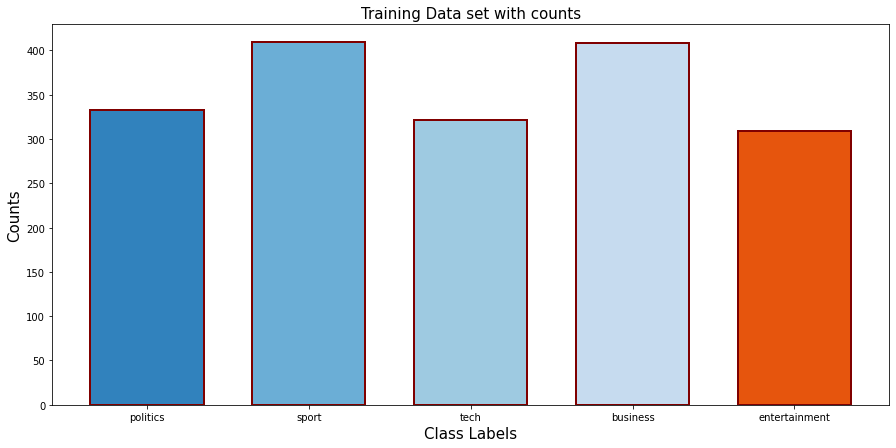

Counter({'sport': 102, 'business': 102, 'politics': 84, 'tech': 80, 'entertainment': 77})


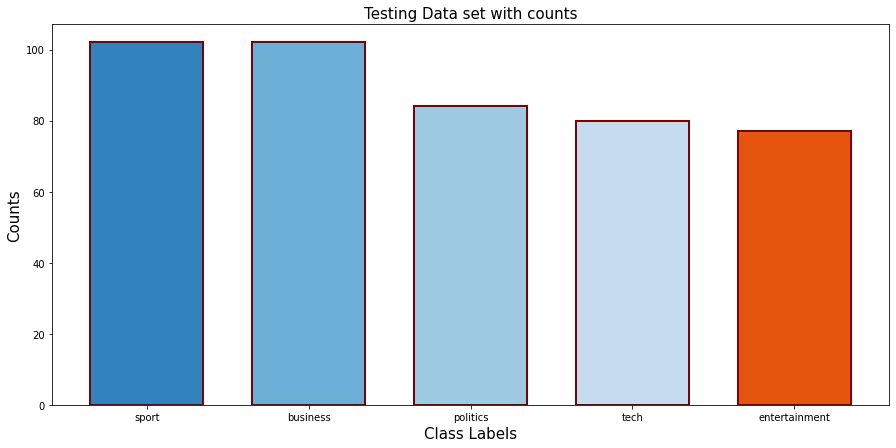

In [4]:
from numpy.ma.core import shape
from collections import Counter
import matplotlib.pyplot as plt
#class_labels = bbc['category'].value_counts()
#print(class_labels)
class_labels1 = training_bbc['category'].values.tolist()
counter1= Counter(class_labels1)
print(counter1)
#shape(class_labels1)
plt.figure(figsize=[15, 7])
col_map = plt.get_cmap('tab20c')

# Creating a bar chart from a dictionary
plt.bar(counter1.keys(), counter1.values(), width=0.7, 
        color=col_map.colors, edgecolor='maroon', linewidth=2)

plt.title('Training Data set with counts', fontsize=15)
plt.xlabel('Class Labels', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

class_labels1 = test_bbc['category'].values.tolist()
counter2= Counter(class_labels1)
print(counter2)
#shape(class_labels1)
plt.figure(figsize=[15, 7])
#col_map = plt.get_cmap('tab20c')

# Creating a bar chart from a dictionary
plt.bar(counter2.keys(), counter2.values(), width=0.7, 
        color=col_map.colors, edgecolor='maroon',linewidth=2)

plt.title('Testing Data set with counts', fontsize=15)
plt.xlabel('Class Labels', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()



### 5. Classification using Naive Bayes

For training and validation, we will use a [Multinomial Naive Bayes classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html). Here, you are expected to:

1. Vectorize the text from the training set.
2. Train the classifier
3. Evaluate the classifier using the test set. 

Tip: You can use [sklearn's pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) functionality to perform steps 1 and 2. 

Tip: You can use [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to print the results of evaluation.


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Train and evaluate a Multinomial Naive Bayes classifier
# To do: Add the code below to build a pipeline for the classifier.

vectorizer = CountVectorizer(stop_words='english')
mnb = MultinomialNB()

pipe = Pipeline([('vectorizer',vectorizer),('mnb', mnb)])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(training_bbc['text'], training_bbc['category'])


y_pred = pipe.predict(test_bbc['text'])
print(classification_report(test_bbc['category'],y_pred))



               precision    recall  f1-score   support

     business       0.97      0.95      0.96       102
entertainment       1.00      0.96      0.98        77
     politics       0.97      1.00      0.98        84
        sport       1.00      0.99      1.00       102
         tech       0.95      0.99      0.97        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



### 6. Baseline Classifier

You can compare the performance of your Machine Learning model with a simple baseline classifier. One possibility could be to use a classifier that generates predictions by respecting the training set’s class distribution. You can consider using [Dummy classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) from scikit learn.



In [6]:
from sklearn.dummy import DummyClassifier

# Evaluate the random baseline
baseline = DummyClassifier(strategy="stratified")

baseline.fit(training_bbc['text'], training_bbc['category'])

baseline.predict(test_bbc['text'])

baseline.score(test_bbc['text'], test_bbc['category'])

y_pred = baseline.predict(test_bbc['text'])
print(classification_report(test_bbc['category'],y_pred))

               precision    recall  f1-score   support

     business       0.22      0.24      0.23       102
entertainment       0.23      0.22      0.23        77
     politics       0.17      0.18      0.17        84
        sport       0.28      0.28      0.28       102
         tech       0.12      0.11      0.12        80

     accuracy                           0.21       445
    macro avg       0.21      0.21      0.21       445
 weighted avg       0.21      0.21      0.21       445



Is the result from the baseline classifier justified?

### 6. Grid Search

So far, you have trained the vectorizer and the classifer using their default parameters. However, in practical settings, one needs to optimize the parameters of the model to maximize the performance. 

Here, you are asked to find the optimal parameters for the pipelines that you have created above using a 5 fold cross validation. The choice of hyperparameters for optimization are:

1. Bi-grams vs uni-grams vs tri-grams from [Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). 
2. Additive smoothing  for the Multinomial naive bayes classifier $\alpha$ = {1, 0.1}
3. Tokenized vs non-tokenized text (For tokenization, you can use the function 'preprocess' that is given below as a parameter for the vectorizer.)


You can refer to the [Grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) documentation from the scikit-learn library.

Finally, print the parameters from the grid search that give the best performance. 

In [7]:

# Function preprocess can be used as a tokenizer.

import spacy
nlp = spacy.load('en_core_web_sm', disable=["tagger", "parser", "ner"])

def preprocess(text):
    doc = nlp(text)
 
    final_key=[]
    for token in doc:
        if token.is_stop==False and token.lemma_.isalpha():
            
            final_key.append(token.lemma_)
        
    return final_key

In [8]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# To do: Replace the ??? in the code and implement the grid search
# Note: Take a look at how you can specify the parameters for grid search from an example of n-grams. Similarly, you can specify the other remaining parameters.

vectorizer = CountVectorizer()

pipe = Pipeline(steps=[("vectorizer",vectorizer), ("mnb", mnb)])

# To do: Replace the ??? in the code and implement the grid search
# Note: Take a look at how you an specify the parameters for grid search from an example of n-grams. Similarly, you can specify the other remaining parameters.
params = {'vectorizer__ngram_range':[(1,1), (1,2), (1,3)],
           'mnb__alpha':[1, 0.1],
           'vectorizer__tokenizer':[None,preprocess]
           #'vectorizer__preprocessor':[preprocess]
           #'vectorizer__analyzer':[preprocess]
          }

clf = GridSearchCV(estimator=pipe, param_grid=params, cv=StratifiedKFold(5))
clf.get_params().keys()
clf.fit(bbc['text'],bbc['category'])

sorted(clf.cv_results_.keys())
clf.best_params_

KeyboardInterrupt: 

## 7. Fine-tuning using BERT

In this section, you will see how a pre-trained BERT model can be fine tuned for the task of text classification. 

Run the following cells to fine-tune the model. 

In [9]:
'Download the tokenizer and BERT module for python'

#!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

! pip install bert-for-tf2
! pip install sentencepiece

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [10]:
'Import all the necessary modules'

#import tokenization
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import tensorflow_hub as hub
import bert
from tensorflow.keras.models import  Model
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

print("TensorFlow Version:",tf.__version__)
print("Hub version: ",hub.__version__)

TensorFlow Version: 2.8.0
Hub version:  0.12.0


In [11]:
'Download the pretrained BERT model'

m_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'
bert_layer = hub.KerasLayer(m_url, trainable=True)

In [14]:
#from bert import bert_tokenization
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
#tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

'Use BERT tokenizer'
#from bert.tokenization import FullTokenizer
FullTokenizer = bert.bert_tokenization.FullTokenizer
tokenizer=FullTokenizer(vocab_file,do_lower_case)


def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
        
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len-len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
        
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

AttributeError: module 'bert' has no attribute 'bert_tokenization'

In [15]:
def build_model(bert_layer, max_len=512):
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")
    
    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    
    clf_output = sequence_output[:, 0, :]
    
    lay = tf.keras.layers.Dense(64, activation='relu')(clf_output)
    lay = tf.keras.layers.Dropout(0.2)(lay)
    lay = tf.keras.layers.Dense(32, activation='relu')(lay)
    lay = tf.keras.layers.Dropout(0.2)(lay)
    out = tf.keras.layers.Dense(5, activation='softmax')(lay)
    
    model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(tf.keras.optimizers.Adam(lr=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [16]:
'Set the maximum length of the sequence'
max_len = 512

'Transform non-numerical labels to numerical'
label = preprocessing.LabelEncoder()
train_labels = label.fit_transform(training_bbc['category'])
train_labels = to_categorical(train_labels)

'Prepare the input by tokenising and padding the text sequence'
train_input = bert_encode(training_bbc.text.values, tokenizer, max_len=max_len)
test_input = bert_encode(test_bbc.text.values, tokenizer, max_len=max_len)



NameError: name 'bert_encode' is not defined

In [17]:
labels = label.classes_
print(labels)

['business' 'entertainment' 'politics' 'sport' 'tech']


In [18]:
'Build the model'

model = build_model(bert_layer, max_len=max_len)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 512)]        0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 512)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 512, 768)]                'input_mask[0][0]',         

In [19]:
'Start training the model'

checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

train_sh = model.fit(
    train_input, train_labels,
    validation_split=0.1,
    epochs=1,
    callbacks=[checkpoint, earlystopping],
    batch_size=4,
    verbose=1
)

NameError: name 'train_input' is not defined

In [21]:
'Predict the classes from the fine-tuned BERT model'
bert_pred = model.predict(test_input)

NameError: name 'test_input' is not defined

In [ ]:
'Invert the classes from numerical to non-numerical (original) categories'
y_pred_bert = label.inverse_transform(np.argmax(bert_pred.round().astype(int), axis=1))

In [ ]:

print(classification_report(test_bbc['category'], y_pred_bert, digits=4))

1. Comment on the results. Is there any improvement in performance when compared to MultinomialNB?

2. Try changing the number of epochs to 3 and then 5 to see if there is any improvement in the performance. 